## Model Build

In [1]:
# to handle datasets
import pandas as pd
import numpy as np

# for plotting
import matplotlib.pyplot as plt
%matplotlib inline

# to build the models
from sklearn.linear_model import Lasso, LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVR
import xgboost as xgb

# to evaluate the models
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

In [2]:
# load dataset
# We  load the datasets with the engineered values: we built and saved this datasets in a previous lecture (feature engineering lecture).
# If you haven't done so, go ahead and check the previous lecture / notebook to find out how to create these datasets

X_train = pd.read_csv('Data/xtrain.csv')
X_test = pd.read_csv('Data/xtest.csv')

X_train.head()

,id_mutation,id_parcelle,id_bien,date_mutation,adresse_nom_voie,nom_commune,valeur_fonciere,nature_mutation,code_departement,nombre_lots,code_type_local,type_local,surface_reelle_bati,nombre_pieces_principales,surface_terrain,longitude,latitude,code_type_local_na,surface_reelle_bati_na,nombre_pieces_principales_na,surface_terrain_na,longitude_na,latitude_na
0,2017-1381514,95018000AV0057,95018000AV0057-95,2017-05-16,RUE DE ST QUENTIN,Argenteuil,12.354493,0.666667,0.950,0.00000,0.000000,1.00,0.331789,0.033333,0.317739,0.808165,0.984716,0.0,0.0,0.0,0.0,0.0,0.0
1,2017-131542,132098460A0288,132098460A0288-13,2017-04-07,RUE ANTOINE FORTUNE MARION,Marseille 9e Arrondissement,13.075272,0.666667,0.875,0.00000,0.000000,1.00,0.381939,0.055556,0.405742,0.860498,0.940072,0.0,0.0,0.0,0.0,0.0,0.0
2,2017-1162525,83038000AB0022,83038000AB0022-83,2017-05-22,SAINTE ANNE,Châteaudouble,11.652687,0.666667,0.850,0.00000,0.000000,0.00,0.349591,0.044444,0.497230,0.871099,0.943037,1.0,1.0,1.0,0.0,0.0,0.0
3,2019-173403,44109000NY0325,44109000NY0325-44,2019-03-29,RUE FELIX LEMOINE,Nantes,9.510445,0.666667,0.575,0.00303,0.666667,0.25,0.349591,0.000000,0.416154,NaN,0.971868,0.0,1.0,0.0,1.0,0.0,0.0
4,2017-242501,22011000AB0237,22011000AB0237-22,2017-04-27,LE BOURG,Boqueho,8.006368,0.666667,0.125,0.00000,0.000000,0.00,0.349591,0.044444,0.227757,NaN,0.981227,1.0,1.0,1.0,0.0,0.0,0.0


In [3]:
# capture the target
y_train = X_train['valeur_fonciere']
y_test = X_test['valeur_fonciere']

In [4]:
# load selected features
# we selected the features in the previous lecture / notebook
# if you haven't done so, go ahead and visit the previous lecture to find out how to select
# the features

features = pd.read_csv('Data/selected_features.csv', header=None)

features = [x for x in features[0]] 

# here I will add this last feature, even though it was not selected in our previous step,
# because it needs key feature engineering steps that I want to discuss further during the deployment
# part of the course. 

features = features + ['nombre_pieces_principales'] 

features

['nature_mutation',
 'code_departement',
 'code_type_local',
 'type_local',
 'surface_reelle_bati',
 'surface_terrain',
 'nombre_pieces_principales']

In [5]:
# reduce the train and test set to the desired features

X_train = X_train[features]
X_test = X_test[features]

### Regularised linear regression

Remember to set the seed.

In [6]:
# train the model
lin_model = Lasso(alpha=0.005, random_state=123) # remember to set the random_state / seed
lin_model.fit(X_train, y_train)

Lasso(alpha=0.005, random_state=123)

In [7]:
# evaluate the model:
# remember that we log transformed the output (SalePrice) in our feature engineering notebook / lecture.

# In order to get the true performance of the Lasso
# we need to transform both the target and the predictions
# back to the original house prices values.

# We will evaluate performance using the mean squared error and the
# root of the mean squared error

pred = lin_model.predict(X_train)
print('linear train mse: {}'.format(mean_squared_error(np.exp(y_train), np.exp(pred))))
print('linear train rmse: {}'.format(sqrt(mean_squared_error(np.exp(y_train), np.exp(pred)))))
print('linear train r2 score: {}'.format(r2_score(np.exp(y_train), np.exp(pred))))
print()
pred = lin_model.predict(X_test)
print('linear test mse: {}'.format(mean_squared_error(np.exp(y_test), np.exp(pred))))
print('linear test rmse: {}'.format(sqrt(mean_squared_error(np.exp(y_test), np.exp(pred)))))
print('linear train r2 score: {}'.format(r2_score(np.exp(y_test), np.exp(pred))))
print()
print('Average house price: ', np.exp(y_train).median())

linear train mse: 3952014288849.5107
linear train rmse: 1987967.3762035207
linear train r2 score: 0.00041028706283052774

linear test mse: 8289962613220.356
linear test rmse: 2879229.5172876297
linear train r2 score: 0.00014883923373709695

Average house price:  120000.00000000028


Text(0.5, 1.0, 'Evaluation of Lasso Predictions')

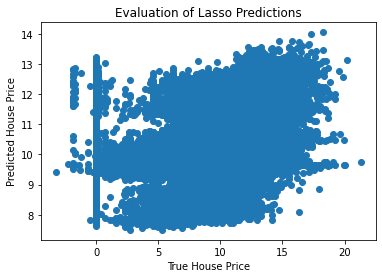

In [8]:
# let's evaluate our predictions respect to the original price
plt.scatter(y_test, lin_model.predict(X_test))
plt.xlabel('True House Price')
plt.ylabel('Predicted House Price')
plt.title('Evaluation of Lasso Predictions')

We can see that our model is doing a pretty good job at estimating house prices.

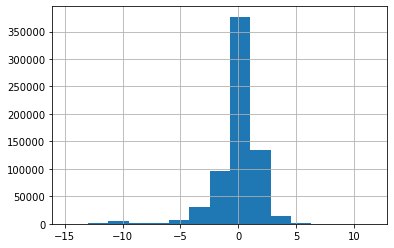

In [9]:
# let's evaluate the distribution of the errors: 
# they should be fairly normally distributed

errors = y_test - lin_model.predict(X_test)
errors.hist(bins=15)

The distribution of the errors follows quite closely a gaussian distribution. That suggests that our model is doing a good job as well.

### Feature importance

Text(0.5, 1.0, 'Feature Importance')

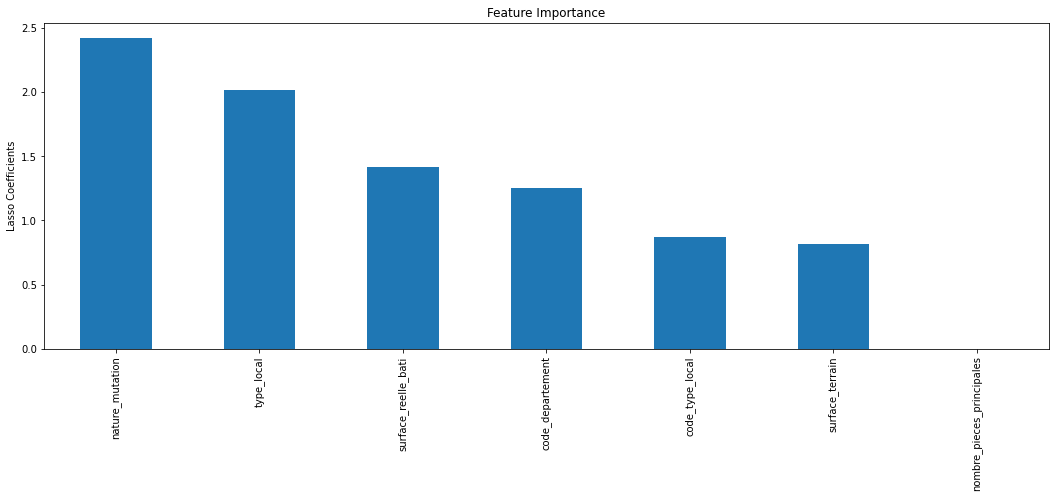

In [10]:
# Finally, just for fun, let's look at the feature importance

importance = pd.Series(np.abs(lin_model.coef_.ravel()))
importance.index = features
importance.sort_values(inplace=True, ascending=False)
importance.plot.bar(figsize=(18,6))
plt.ylabel('Lasso Coefficients')
plt.title('Feature Importance')

And that is all! Now we have our entire pipeline ready for deployment. In the next video, I will summarise which steps from the pipeline we will deploy or in other words, put in production.

In [11]:
linreg_model = LinearRegression() # remember to set the random_state / seed
linreg_model.fit(X_train, y_train)

LinearRegression()

In [12]:
predlr = linreg_model.predict(X_train)
print('linear regression train mse: {}'.format(mean_squared_error(np.exp(y_train), np.exp(predlr))))
print('linear regression train rmse: {}'.format(sqrt(mean_squared_error(np.exp(y_train), np.exp(predlr)))))
print('linear regression train r2 score: {}'.format(r2_score(np.exp(y_train), np.exp(predlr))))
print()
predlr = linreg_model.predict(X_test)
print('linear regression test mse: {}'.format(mean_squared_error(np.exp(y_test), np.exp(predlr))))
print('linear regression test rmse: {}'.format(sqrt(mean_squared_error(np.exp(y_test), np.exp(predlr)))))
print('linear regression train r2 score: {}'.format(r2_score(np.exp(y_test), np.exp(predlr))))
print()
print('Average house price: ', np.exp(y_train).median())

linear regression train mse: 4088423032683.79
linear regression train rmse: 2021984.9239506684
linear regression train r2 score: -0.03409180911534948

linear regression test mse: 44196069506402.2
linear regression test rmse: 6648012.447822447
linear regression train r2 score: -4.330481385623116

Average house price:  120000.00000000028


Text(0.5, 1.0, 'Evaluation of Linear Regression Predictions')

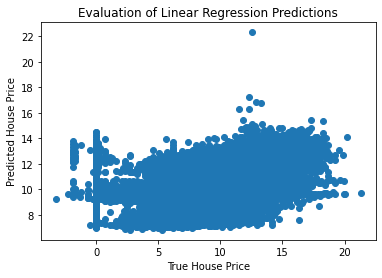

In [13]:
plt.scatter(y_test, linreg_model.predict(X_test))
plt.xlabel('True House Price')
plt.ylabel('Predicted House Price')
plt.title('Evaluation of Linear Regression Predictions')

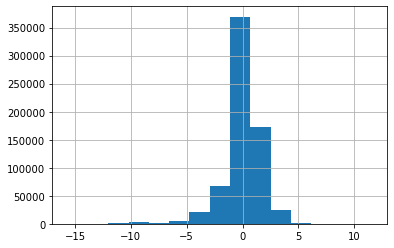

In [14]:
# let's evaluate the distribution of the errors: 
# they should be fairly normally distributed

errors = y_test - linreg_model.predict(X_test)
errors.hist(bins=15)

In [15]:
ridge_model = Ridge() # remember to set the random_state / seed
ridge_model.fit(X_train, y_train)

Ridge()

In [16]:
predR = ridge_model.predict(X_train)
print('ridge train mse: {}'.format(mean_squared_error(np.exp(y_train), np.exp(predR))))
print('ridge train rmse: {}'.format(sqrt(mean_squared_error(np.exp(y_train), np.exp(predR)))))
print('ridge train r2 score: {}'.format(r2_score(np.exp(y_train), np.exp(predR))))
print()
predR = ridge_model.predict(X_test)
print('ridge test mse: {}'.format(mean_squared_error(np.exp(y_test), np.exp(predR))))
print('ridge test rmse: {}'.format(sqrt(mean_squared_error(np.exp(y_test), np.exp(predR)))))
print('ridge train r2 score: {}'.format(r2_score(np.exp(y_test), np.exp(predR))))
print()
print('Average house price: ', np.exp(y_train).median())

ridge train mse: 4073351328631.8604
ridge train rmse: 2018254.5252350755
ridge train r2 score: -0.03027969730966862

ridge test mse: 39701144688342.27
ridge test rmse: 6300884.436993133
ridge train r2 score: -3.788349170246521

Average house price:  120000.00000000028


Text(0.5, 1.0, 'Evaluation of Ridge Predictions')

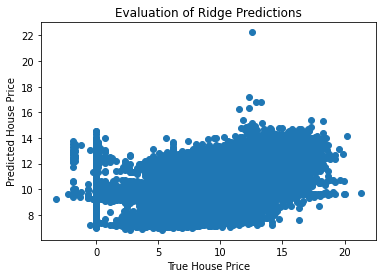

In [17]:
plt.scatter(y_test, ridge_model.predict(X_test))
plt.xlabel('True House Price')
plt.ylabel('Predicted House Price')
plt.title('Evaluation of Ridge Predictions')

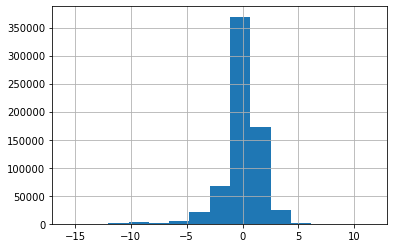

In [18]:
# let's evaluate the distribution of the errors: 
# they should be fairly normally distributed

errors = y_test - ridge_model.predict(X_test)
errors.hist(bins=15)

In [19]:
dt_model = DecisionTreeRegressor() # remember to set the random_state / seed
dt_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [20]:
preddt = dt_model.predict(X_train)
print('decision tree train mse: {}'.format(mean_squared_error(np.exp(y_train), np.exp(preddt))))
print('decision tree train rmse: {}'.format(sqrt(mean_squared_error(np.exp(y_train), np.exp(preddt)))))
print('decision tree train r2 score: {}'.format(r2_score(np.exp(y_train), np.exp(preddt))))
print()
preddt = dt_model.predict(X_test)
print('decision tree test mse: {}'.format(mean_squared_error(np.exp(y_test), np.exp(preddt))))
print('decision tree test rmse: {}'.format(sqrt(mean_squared_error(np.exp(y_test), np.exp(preddt)))))
print('decision tree train r2 score: {}'.format(r2_score(np.exp(y_test), np.exp(preddt))))
print()
print('Average house price: ', np.exp(y_train).median())

decision tree train mse: 1328018266535.8845
decision tree train rmse: 1152396.7487527395
decision tree train r2 score: 0.6641020753474125

decision tree test mse: 12855740852031.67
decision tree test rmse: 3585490.3224010617
decision tree train r2 score: -0.5505289967068832

Average house price:  120000.00000000028


Text(0.5, 1.0, 'Evaluation of Decision Tree Predictions')

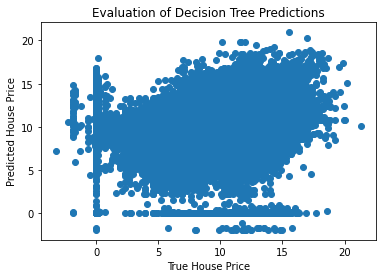

In [21]:
plt.scatter(y_test, dt_model.predict(X_test))
plt.xlabel('True House Price')
plt.ylabel('Predicted House Price')
plt.title('Evaluation of Decision Tree Predictions')

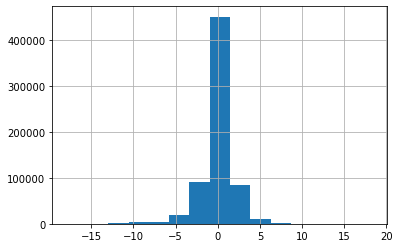

In [22]:
# let's evaluate the distribution of the errors: 
# they should be fairly normally distributed

errors = y_test - dt_model.predict(X_test)
errors.hist(bins=15)

In [24]:
xgb_model = xgb.XGBRegressor() # remember to set the random_state / seed
xgb_model.fit(X_train, y_train)

KeyError: 'base_score'

KeyError: 'base_score'

In [25]:
predxgb = xgb_model.predict(X_train)
print('xgboost train mse: {}'.format(mean_squared_error(np.exp(y_train), np.exp(predxgb))))
print('xgboost train rmse: {}'.format(sqrt(mean_squared_error(np.exp(y_train), np.exp(predxgb)))))
print('xgboost train r2 score: {}'.format(r2_score(np.exp(y_train), np.exp(predxgb))))
print()
predxgb = xgb_model.predict(X_test)
print('xgboost test mse: {}'.format(mean_squared_error(np.exp(y_test), np.exp(predxgb))))
print('xgboost test rmse: {}'.format(sqrt(mean_squared_error(np.exp(y_test), np.exp(predxgb)))))
print('xgboost train r2 score: {}'.format(r2_score(np.exp(y_test), np.exp(predxgb))))
print()
print('Average house price: ', np.exp(y_train).median())

xgboost train mse: 3625338870624.5947
xgboost train rmse: 1904032.2661721348
xgboost train r2 score: 0.08303685763176794

xgboost test mse: 8095664586021.379
xgboost test rmse: 2845288.1376095074
xgboost train r2 score: 0.023583095465446013

Average house price:  120000.00000000028


Text(0.5, 1.0, 'Evaluation of XGBoost Predictions')

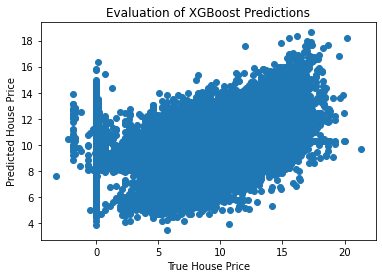

In [26]:
plt.scatter(y_test, xgb_model.predict(X_test))
plt.xlabel('True House Price')
plt.ylabel('Predicted House Price')
plt.title('Evaluation of XGBoost Predictions')

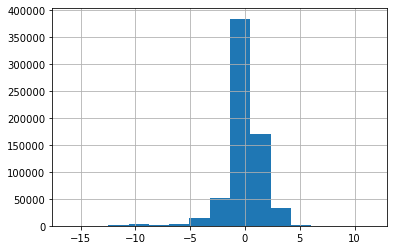

In [27]:
# let's evaluate the distribution of the errors: 
# they should be fairly normally distributed

errors = y_test - xgb_model.predict(X_test)
errors.hist(bins=15)

In [ ]:
svr_model = SVR() # remember to set the random_state / seed
svr_model.fit(X_train, y_train)

In [ ]:
predsvr = svr_model.predict(X_train)
print('svr train mse: {}'.format(mean_squared_error(np.exp(y_train), np.exp(predsvr))))
print('svr train rmse: {}'.format(sqrt(mean_squared_error(np.exp(y_train), np.exp(predsvr)))))
print('svr train r2 score: {}'.format(r2_score(np.exp(y_train), np.exp(predsvr))))
print()
pred = svr_model.predict(X_test)
print('svr test mse: {}'.format(mean_squared_error(np.exp(y_test), np.exp(predsvr))))
print('svr test rmse: {}'.format(sqrt(mean_squared_error(np.exp(y_test), np.exp(predsvr)))))
print('svr train r2 score: {}'.format(r2_score(np.exp(y_test), np.exp(predsvr))))
print()
print('Average house price: ', np.exp(y_train).median())

In [ ]:
plt.scatter(y_test, svr_model.predict(X_test))
plt.xlabel('True House Price')
plt.ylabel('Predicted House Price')
plt.title('Evaluation of SVR Predictions')

In [ ]:
# let's evaluate the distribution of the errors: 
# they should be fairly normally distributed

errors = y_test - svr_model.predict(X_test)
errors.hist(bins=15)